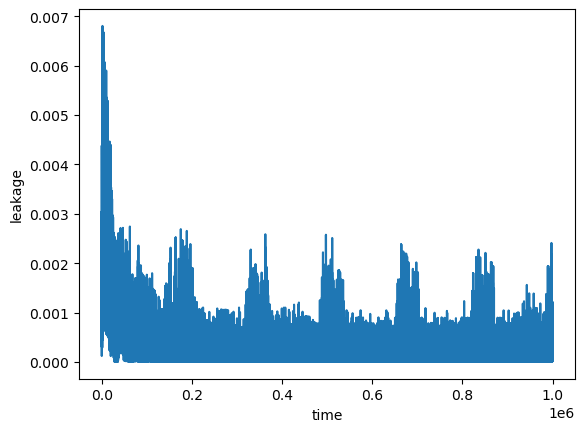

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.fromfile("hack_rf1920x1080@60.0.bin", count=1_000_000, dtype=np.float32)

data_plt = data

plt.figure()
plt.xlabel("time")
plt.ylabel("leakage")
plt.plot(data_plt)
plt.savefig('correlation_visu.png', dpi=300)

166666


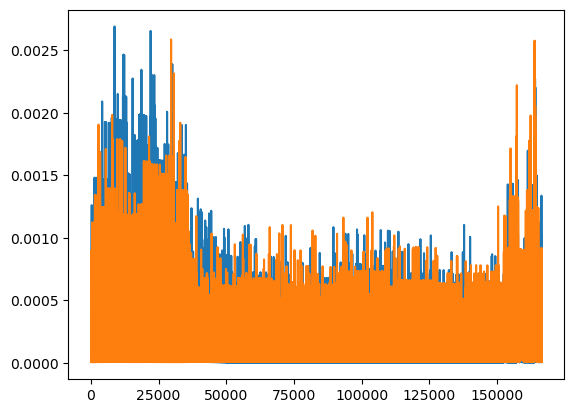

In [12]:
samp_rate = 10e6
sample_size = int(samp_rate/60)
print(sample_size)
plt.plot(data[sample_size:sample_size*2])
plt.plot(data[sample_size*2:sample_size*3])


In [13]:
def mean(X):
    return np.sum(X, axis=0)/len(X)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2, axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar), axis=0)

def pearson(X,Y):
    X_mean = mean(X)
    Y_mean = mean(Y)    
    return cov(X, X_mean, Y, Y_mean)/(std_dev(X, X_mean)*std_dev(Y, Y_mean))

In [14]:
samp1 = data[sample_size:sample_size*2]
samp2 = data[sample_size*2:sample_size*3]

In [15]:
r = pearson(samp1, samp2)
print(r)

0.69037426


In [16]:
rs = []
for i in range(1, len(data)//sample_size-1):
    samp1 = data[sample_size*i:sample_size*(i+1)]
    samp2 = data[sample_size*(i+1):sample_size*(i+2)]
    r = pearson(samp1, samp2)
    rs.append(r)

print(f"{rs}\n max: {max(rs)}, min:{min(rs)}") 

[0.69037426, 0.72244847, 0.7304443, 0.7193502]
 max: 0.7304443120956421, min:0.6903742551803589


In [17]:
print(data.shape[0]/sample_size)

6.000024000096


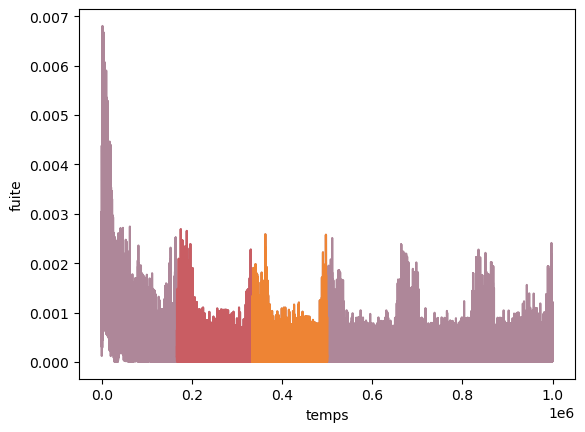

In [18]:
samp_rate = 10e6
frame_t = int(samp_rate/60)

sample_range = np.arange(frame_t, frame_t*2)

plt.figure()
plt.xlabel("temps")
plt.ylabel("fuite")
plt.plot(data_plt, color="#ae8799")
plt.plot(sample_range, data_plt[frame_t:frame_t*2], color="#c95d63")
plt.plot(sample_range+frame_t, data_plt[frame_t*2:frame_t*3], color="#ee8434")

plt.savefig('correlation_visu.png', dpi=300, transparent=True)

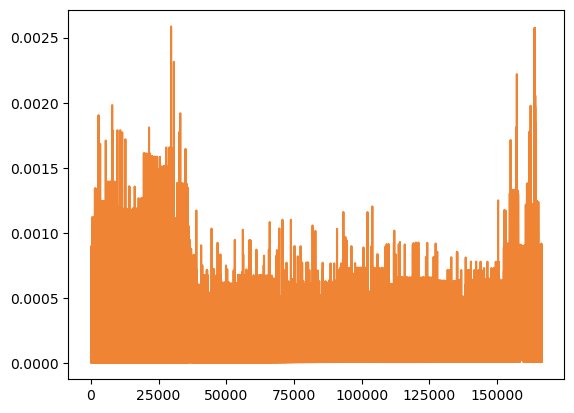

In [19]:
plt.figure()
#plt.plot(data_plt[frame_t:frame_t*2], color="#c95d63")
plt.plot(data_plt[frame_t*2:frame_t*3], color="#ee8434")
plt.savefig('correlation_frameY.png', dpi=300, transparent=True)



In [20]:
samp1 = data_plt[frame_t:frame_t*2]
samp2 = data_plt[frame_t*2:frame_t*3]
r = pearson(samp1, samp2)
print(r)

0.69037426
